In [15]:


!pip install --upgrade openai
import os
from groq import Groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
userdata.get('GROQ_API_KEY')


In [1]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer
import torch

#Pre-trained model and tokenizer
model_name = "distilbert-base-uncased-distilled-squad"
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

question-answering function

In [3]:
def answer_question(question, context):
    inputs = tokenizer(question, context, truncation=True, padding=True, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    answer_start_scores = outputs.start_logits
    answer_end_scores = outputs.end_logits
    answer_start = torch.argmax(answer_start_scores)
    answer_end = torch.argmax(answer_end_scores) + 1
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0][answer_start:answer_end]))
    return answer if answer else "No answer found"

context and question

In [12]:
context = """
AI, or artificial intelligence, refers to the development of computer systems that can perform tasks that typically require human intelligence. These tasks can include learning, problem-solving, understanding natural language, and making decisions. AI technologies can range from machine learning algorithms that improve with experience to advanced robotics that interact with their environment. AI is utilized in various fields such as healthcare, finance, transportation, and more, with the potential to revolutionize how we work and live.
"""

questions =[
    "What is AI?",
    "How does AI work?",
    "What type of data does AI use?"
]

In [13]:
for question in questions:
  answer = answer_question(question, context)
  print(f"Question: {question}\nAnswer: {answer}\n")

Question: What is AI?
Answer: artificial intelligence

Question: How does AI work?
Answer: revolutionize how we work and live

Question: What type of data does AI use?
Answer: machine learning algorithms



Original prompt

In [10]:
original_prompt = "What is AI?"
print("Original Prompt Response:")
print(answer_question(original_prompt, context))

Original Prompt Response:
artificial intelligence


Optimized prompt with more context

In [14]:
optimized_prompt = "Can you explain what AI is in simple terms for a beginner?"
print("\nOptimized Prompt Response:")
print(answer_question(optimized_prompt, context))


Optimized Prompt Response:
machine learning algorithms that improve with experience to advanced robotics that interact with their environment


Response from Chatgpt and gemini

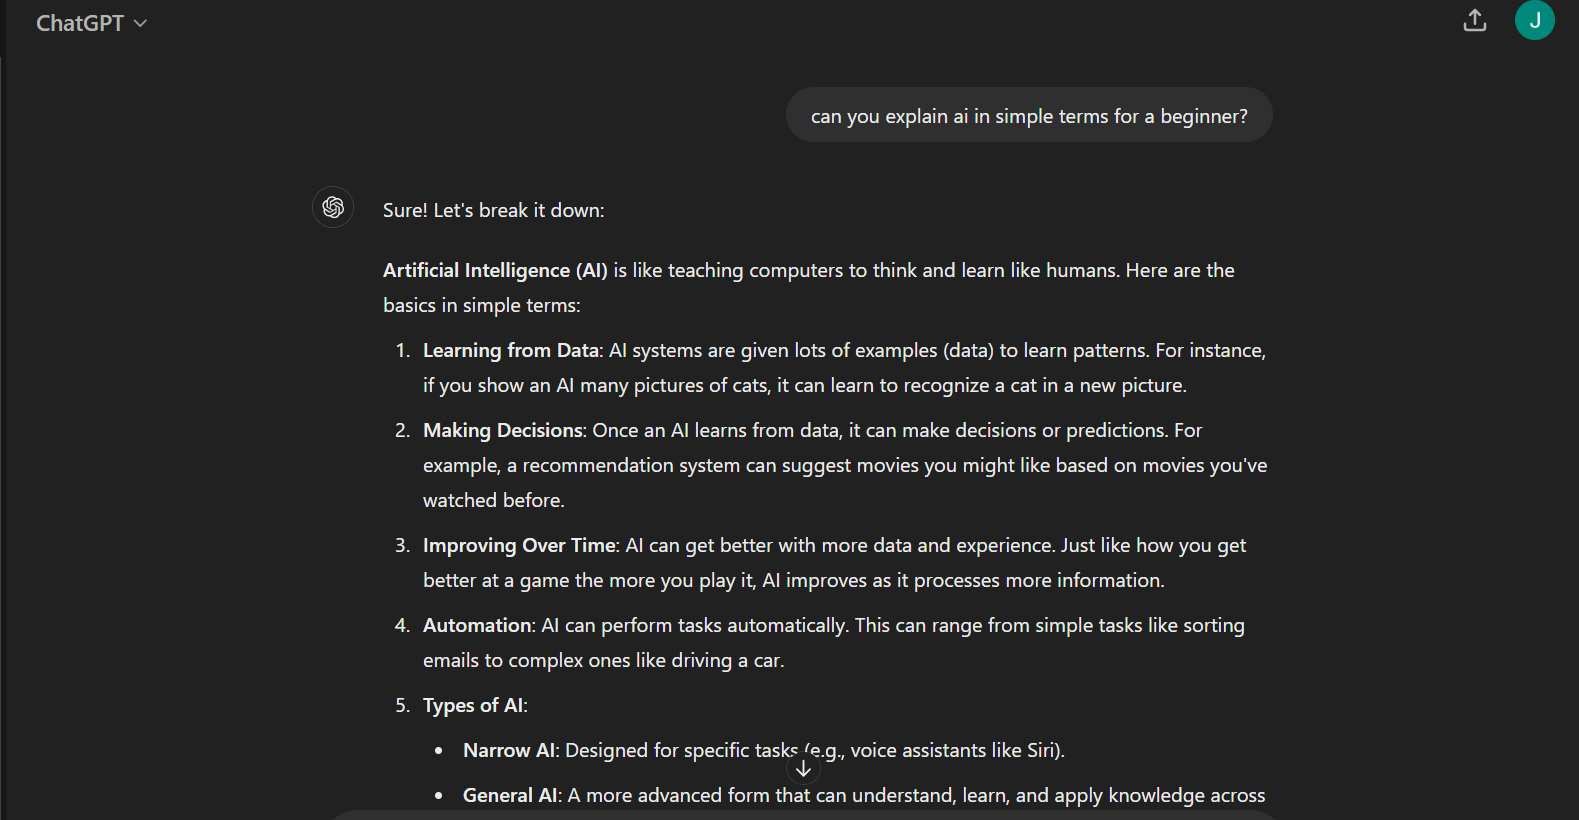

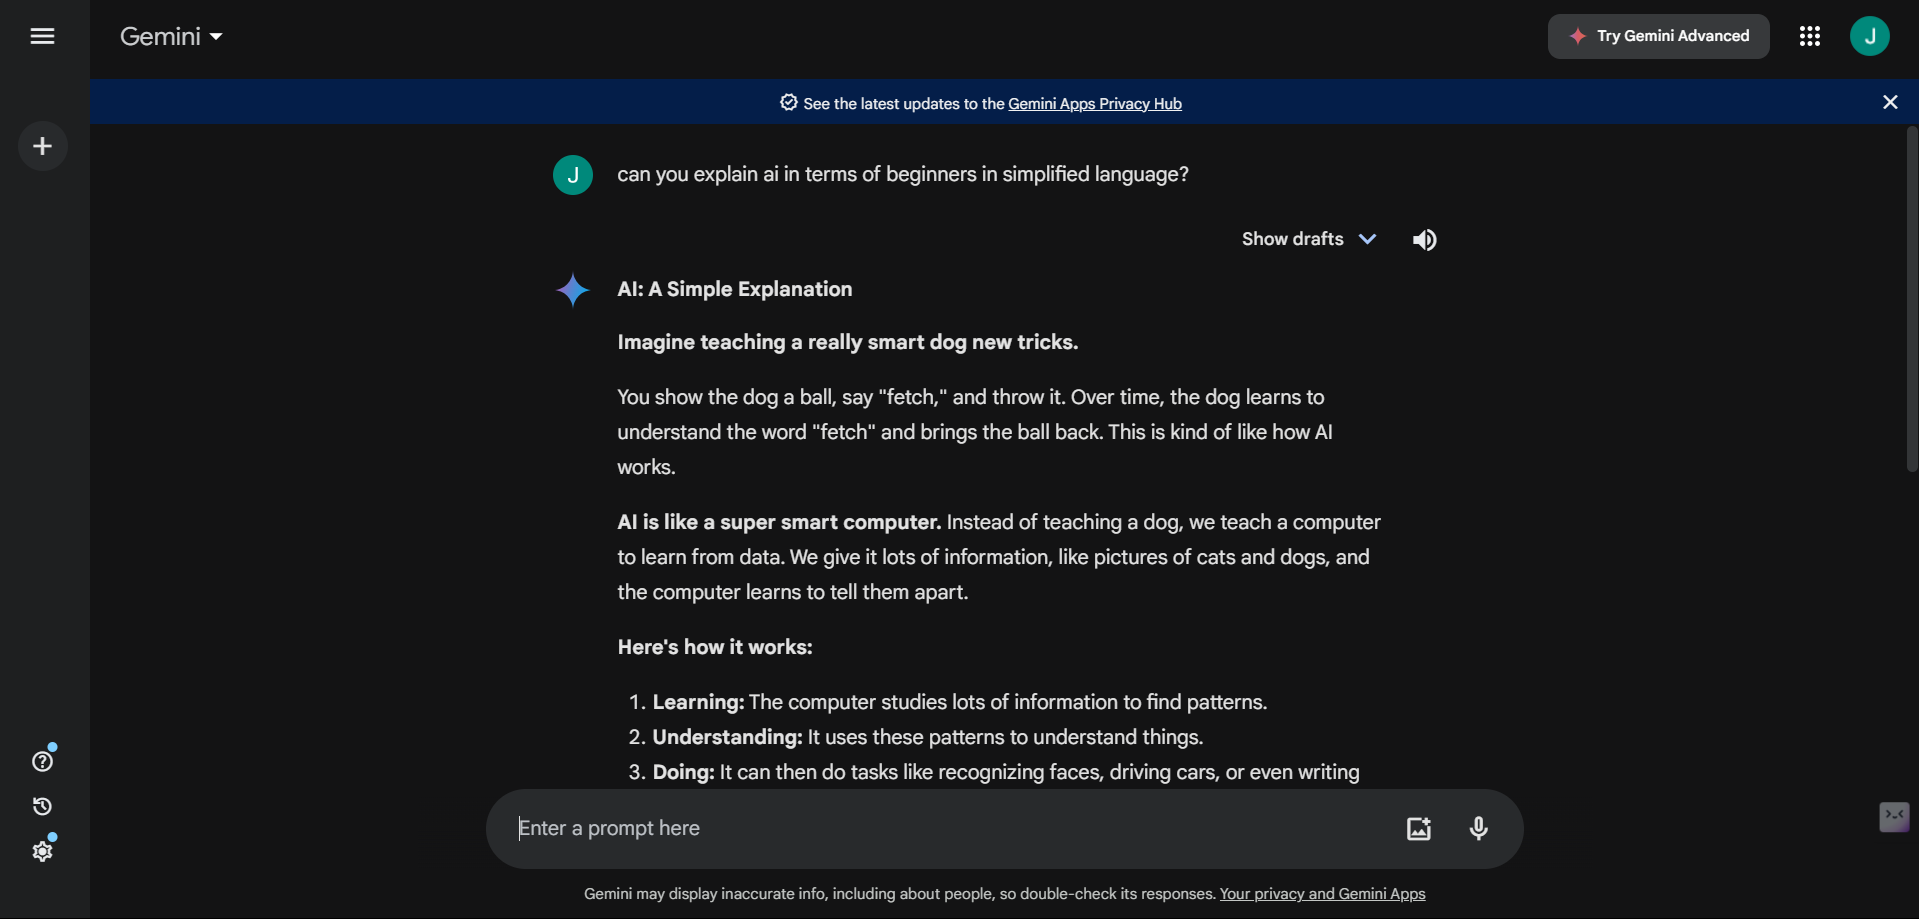

Responses from these models are very clear and simplified using relatable anlogies and metaphors

ChatGPT and Gemini, Both models prioritize clarity and simplicity, using metaphors and analogies to explain complex concepts like machine learning.

Both models ensure accessibility by breaking down complex concepts into simpler terms, ensuring that beginners and non-technical users can grasp the fundamental concepts of machine learning.

Distilbert The response from a fine-tuned DistilBERT model would likely be more technically oriented, focusing on precise definitions and mechanisms without the use of creative analogies unless explicitly fine-tuned for such prompts